In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [93]:
train_df.shape

(12654, 25)

In [94]:
test_df.shape

(5852, 24)

In [95]:
train_df.head()

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category
0,tour_idftaa27vp,FRANCE,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,Yes,0,...,No,No,No,No,No,NaN,"cloudy,",30+,NaN,1.0
1,tour_iduck75m57,KENYA,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,Yes,6,...,No,No,No,No,No,15-30,"sunny,",30+,NaN,2.0
2,tour_id8y3w40h8,SOUTH AFRICA,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,No,4,...,No,No,No,No,No,90+,"sunny,",30+,none,2.0
3,tour_idkoh8mkgr,ITALY,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,0,...,Yes,Yes,Yes,Yes,No,8-14,NaN,NaN,none,0.0
4,tour_idkmsfa00a,ITALY,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,Yes,0,...,Yes,No,No,No,No,90+,"sunny,",7-14,NaN,0.0


In [96]:
(train_df['visitor_nation'] == 'Mexico').sum()

0

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   trip_ID                          12654 non-null  object 
 1   visitor_nation                   12424 non-null  object 
 2   age_bracket                      12646 non-null  object 
 3   travelling_with                  11917 non-null  object 
 4   female_count                     12652 non-null  float64
 5   male_count                       12650 non-null  float64
 6   key_activity                     12526 non-null  object 
 7   trip_purpose                     12654 non-null  object 
 8   first_time_visitor               12555 non-null  object 
 9   mainland_nights                  12654 non-null  int64  
 10  island_nights                    12654 non-null  int64  
 11  tour_arrangement                 12654 non-null  object 
 12  transport_package_

### Removing Unnecessary Columns

To improve the dataset's efficiency and focus on predictive features, the following columns were removed from both the training and testing datasets:

1. **`trip_ID`**: A unique identifier for each trip, which doesn’t contribute to the predictive analysis.
2. **`travelling_with`**: Describes the group composition (e.g., "With Spouse", "Alone"), which may not provide significant predictive value.
3. **`trip_purpose`**: Indicates the purpose of the trip (e.g., "Leisure and Holidays", "Meetings and Conference"), removed due to potential redundancy or irrelevance.
4. **`first_time_visitor`**: A binary indicator of whether it was the visitor's first trip, deemed unnecessary for the model.
5. **`source_of_info`**: Refers to where the visitor heard about the destination, which is too specific or unrelated (assumed from prior description).
6. **`weather_at_arrival`**: Specifies the weather upon arrival (e.g., "sunny," "cloudy"), potentially subjective or not directly relevant to the analysis.

These columns were removed to reduce data dimensionality and to improve the model's focus on more predictive features.

In [98]:
train_df = train_df.drop(columns = ['trip_ID','travelling_with','trip_purpose','first_time_visitor','source_of_info','weather_at_arrival'])
test_df = test_df.drop(columns = ['trip_ID','travelling_with','trip_purpose','first_time_visitor','source_of_info','weather_at_arrival'])

In [99]:
train_df.head()

,visitor_nation,age_bracket,female_count,male_count,key_activity,mainland_nights,island_nights,tour_arrangement,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,tour_length,special_requirements,category
0,FRANCE,45-64,1.0,2.0,Beach Tourism,0,7,Independent,No,No,No,No,No,No,No,NaN,30+,NaN,1.0
1,KENYA,45-64,1.0,0.0,Conference Tourism,6,0,Independent,No,No,No,No,No,No,No,15-30,30+,NaN,2.0
2,SOUTH AFRICA,25-44,2.0,0.0,Cultural Tourism,4,2,Independent,No,No,No,No,No,No,No,90+,30+,none,2.0
3,ITALY,25-44,1.0,1.0,Widlife Tourism,0,7,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,8-14,NaN,none,0.0
4,ITALY,25-44,1.0,1.0,Beach Tourism,0,7,Package Tour,Yes,Yes,Yes,No,No,No,No,90+,7-14,NaN,0.0


In [100]:
train_df.shape

(12654, 19)

The columns **`mainland_nights`** and **`island_nights`** represent the number of nights a visitor spends on the mainland and on islands, respectively, during their trip. These two values together contribute to the overall **trip cost**, as the total duration of the stay directly impacts expenses.

- **`mainland_nights`**: Refers to the nights spent on the mainland, which could involve specific activities or accommodation types that differ in cost from those on islands.
- **`island_nights`**: Represents the nights spent on islands, often associated with higher costs due to limited resources, premium accommodations, or special activities that can occur in island destinations.

By merging these columns into a single **`total_nights`** feature, we create a better representation of the trip duration, which simplifies analysis and enhances feature relevance for predicting trip-related outcomes.

In [101]:
train_df['total_nights'] = train_df['mainland_nights'] + train_df['island_nights']
test_df['total_nights'] = test_df['mainland_nights'] + test_df['island_nights']

In [102]:
train_df['total_nights'].describe()

,total_nights
count,12654.000000
mean,11.721906
std,14.916741
min,1.000000
25%,5.000000
50%,8.000000
75%,14.000000
max,371.000000


In [103]:
train_df = train_df.dropna(subset=['female_count', 'male_count'])
# test_df = test_df.dropna(subset=['female_count', 'male_count'])

### Creating the `total_count` Feature

To capture the total number of travelers in each group, the **`female_count`** and **`male_count`** columns were combined to create a new feature called **`total_count`**.

- **`female_count`**: The number of female travelers in the group.
- **`male_count`**: The number of male travelers in the group.

By adding these two columns, we obtain the **`total_count`** feature, which represents the complete group size for each trip.

In [104]:
train_df['total_count'] = train_df['female_count'] + train_df['male_count']
test_df['total_count'] = test_df['female_count'] + test_df['male_count']

<ipython-input-104-8027a4d9e9fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['total_count'] = train_df['female_count'] + train_df['male_count']


In [105]:
train_df.head()

,visitor_nation,age_bracket,female_count,male_count,key_activity,mainland_nights,island_nights,tour_arrangement,transport_package_international,package_accomodation,...,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,tour_length,special_requirements,category,total_nights,total_count
0,FRANCE,45-64,1.0,2.0,Beach Tourism,0,7,Independent,No,No,...,No,No,No,No,NaN,30+,NaN,1.0,7,3.0
1,KENYA,45-64,1.0,0.0,Conference Tourism,6,0,Independent,No,No,...,No,No,No,No,15-30,30+,NaN,2.0,6,1.0
2,SOUTH AFRICA,25-44,2.0,0.0,Cultural Tourism,4,2,Independent,No,No,...,No,No,No,No,90+,30+,none,2.0,6,2.0
3,ITALY,25-44,1.0,1.0,Widlife Tourism,0,7,Package Tour,No,Yes,...,Yes,Yes,Yes,No,8-14,NaN,none,0.0,7,2.0
4,ITALY,25-44,1.0,1.0,Beach Tourism,0,7,Package Tour,Yes,Yes,...,No,No,No,No,90+,7-14,NaN,0.0,7,2.0


In [106]:
train_df = train_df.drop(columns = ['female_count','male_count','mainland_nights','island_nights'])
test_df = test_df.drop(columns = ['female_count','male_count','mainland_nights','island_nights'])

In [107]:
train_df.head()

,visitor_nation,age_bracket,key_activity,tour_arrangement,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,tour_length,special_requirements,category,total_nights,total_count
0,FRANCE,45-64,Beach Tourism,Independent,No,No,No,No,No,No,No,NaN,30+,NaN,1.0,7,3.0
1,KENYA,45-64,Conference Tourism,Independent,No,No,No,No,No,No,No,15-30,30+,NaN,2.0,6,1.0
2,SOUTH AFRICA,25-44,Cultural Tourism,Independent,No,No,No,No,No,No,No,90+,30+,none,2.0,6,2.0
3,ITALY,25-44,Widlife Tourism,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,8-14,NaN,none,0.0,7,2.0
4,ITALY,25-44,Beach Tourism,Package Tour,Yes,Yes,Yes,No,No,No,No,90+,7-14,NaN,0.0,7,2.0


In [108]:
crosstable = pd.crosstab(train_df['key_activity'], train_df['category'])
crosstable

category,0.0,1.0,2.0
key_activity,,,
Beach Tourism,1383,1212,258
Bird Tourism,32,49,21
Business,102,69,16
Conference Tourism,745,516,59
Cultural Tourism,255,453,240
Diving and Sport Fishing,13,6,5
Hunting Tourism,122,569,397
Mountain Climbing,43,209,75
Widlife Tourism,2651,1223,209


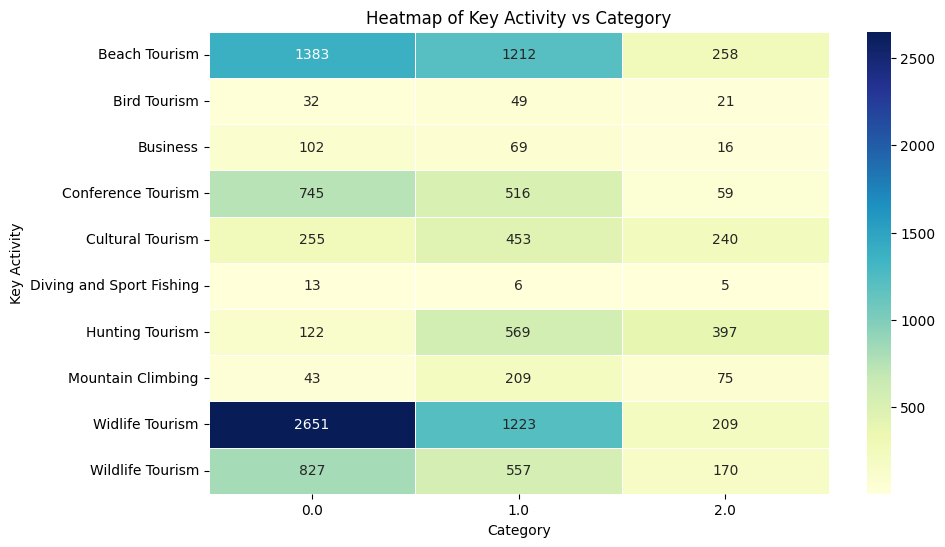

In [109]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstable, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Key Activity vs Category")
plt.xlabel("Category")
plt.ylabel("Key Activity")
plt.show()

### Correcting Spelling Errors

The column **`key_activity`** contains a spelling error where "Widlife Tourism" should be corrected to "Wildlife Tourism." Such corrections ensure consistency and improve the quality of the data for analysis and modeling.

#### Steps Taken:
- Identified and replaced all occurrences of "Widlife Tourism" with "Wildlife Tourism" in the **`key_activity`** column.


In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12648 entries, 0 to 12653
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   12418 non-null  object 
 1   age_bracket                      12640 non-null  object 
 2   key_activity                     12520 non-null  object 
 3   tour_arrangement                 12648 non-null  object 
 4   transport_package_international  12501 non-null  object 
 5   package_accomodation             12505 non-null  object 
 6   food_package                     12477 non-null  object 
 7   transport_package_mx             12648 non-null  object 
 8   sightseeing_package              12648 non-null  object 
 9   guided_tour_package              12648 non-null  object 
 10  insurance_package                12413 non-null  object 
 11  days_before_booked               11097 non-null  object 
 12  tour_length            

In [111]:
columns_to_display = [
    'tour_arrangement',
    'transport_package_international',
    'package_accomodation',
    'food_package',
    'transport_package_mx',
    'sightseeing_package',
    'guided_tour_package',
    'insurance_package'
]

train_df[columns_to_display]

,tour_arrangement,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package
0,Independent,No,No,No,No,No,No,No
1,Independent,No,No,No,No,No,No,No
2,Independent,No,No,No,No,No,No,No
3,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No
4,Package Tour,Yes,Yes,Yes,No,No,No,No
...,...,...,...,...,...,...,...,...
12649,Package Tour,No,Yes,Yes,Yes,Yes,No,No
12650,Independent,No,No,No,No,No,No,No
12651,Independent,No,No,No,No,No,No,No
12652,Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes


### Dropping the `tour_arrangement` Column

The **`tour_arrangement`** column was removed from both the training and testing datasets as it contains binary information distinguishing between independent and package tours.

The following columns provide similar information regarding the type of tour, whether independent or packaged:
- **`transport_package_international`**
- **`package_accomodation`**
- **`food_package`**
- **`transport_package_mx`**
- **`sightseeing_package`**
- **`guided_tour_package`**
- **`insurance_package`**

These columns effectively capture the tour package details, making the `tour_arrangement` column redundant.


In [112]:
train_df = train_df.drop(columns = ['tour_arrangement'])
test_df = test_df.drop(columns = ['tour_arrangement'])

In [113]:
train_df.head()

,visitor_nation,age_bracket,key_activity,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,tour_length,special_requirements,category,total_nights,total_count
0,FRANCE,45-64,Beach Tourism,No,No,No,No,No,No,No,NaN,30+,NaN,1.0,7,3.0
1,KENYA,45-64,Conference Tourism,No,No,No,No,No,No,No,15-30,30+,NaN,2.0,6,1.0
2,SOUTH AFRICA,25-44,Cultural Tourism,No,No,No,No,No,No,No,90+,30+,none,2.0,6,2.0
3,ITALY,25-44,Widlife Tourism,No,Yes,Yes,Yes,Yes,Yes,No,8-14,NaN,none,0.0,7,2.0
4,ITALY,25-44,Beach Tourism,Yes,Yes,Yes,No,No,No,No,90+,7-14,NaN,0.0,7,2.0


In [114]:
train_df['key_activity'] = train_df['key_activity'].replace('Widlife Tourism', 'Wildlife Tourism')
test_df['key_activity'] = test_df['key_activity'].replace('Widlife Tourism', 'Wildlife Tourism')

<ipython-input-115-1f48743bbb54>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")


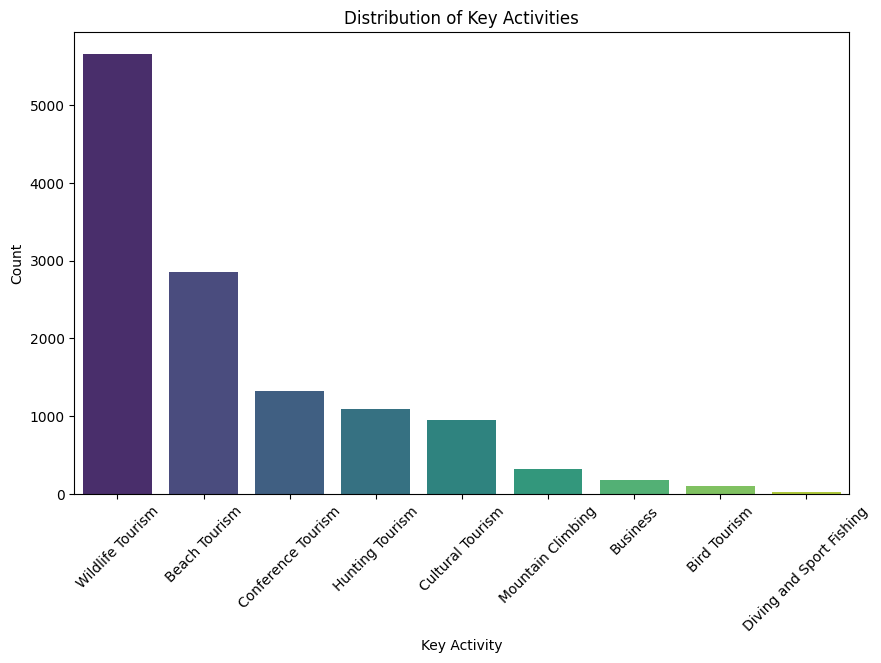

In [115]:
activity_counts = train_df['key_activity'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")
plt.title("Distribution of Key Activities")
plt.xlabel("Key Activity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

As 'Mountain Climbing', 'Business', 'Bird Tourism', and 'Diving and Sport Fishing' are much less frequent compared to the rest of the categories, we replace all these activities with the label "Others".

In [116]:
activities_to_replace = ['Mountain Climbing', 'Business', 'Bird Tourism', 'Diving and Sport Fishing']

train_df['key_activity'] = train_df['key_activity'].replace(activities_to_replace, 'Others')
test_df['key_activity'] = test_df['key_activity'].replace(activities_to_replace, 'Others')


In [117]:
train_df['key_activity'].value_counts()

,count
key_activity,
Wildlife Tourism,5656
Beach Tourism,2860
Conference Tourism,1323
Hunting Tourism,1090
Cultural Tourism,950
Others,641


In [118]:
train_df.head()

,visitor_nation,age_bracket,key_activity,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,tour_length,special_requirements,category,total_nights,total_count
0,FRANCE,45-64,Beach Tourism,No,No,No,No,No,No,No,NaN,30+,NaN,1.0,7,3.0
1,KENYA,45-64,Conference Tourism,No,No,No,No,No,No,No,15-30,30+,NaN,2.0,6,1.0
2,SOUTH AFRICA,25-44,Cultural Tourism,No,No,No,No,No,No,No,90+,30+,none,2.0,6,2.0
3,ITALY,25-44,Wildlife Tourism,No,Yes,Yes,Yes,Yes,Yes,No,8-14,NaN,none,0.0,7,2.0
4,ITALY,25-44,Beach Tourism,Yes,Yes,Yes,No,No,No,No,90+,7-14,NaN,0.0,7,2.0


In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12648 entries, 0 to 12653
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   12418 non-null  object 
 1   age_bracket                      12640 non-null  object 
 2   key_activity                     12520 non-null  object 
 3   transport_package_international  12501 non-null  object 
 4   package_accomodation             12505 non-null  object 
 5   food_package                     12477 non-null  object 
 6   transport_package_mx             12648 non-null  object 
 7   sightseeing_package              12648 non-null  object 
 8   guided_tour_package              12648 non-null  object 
 9   insurance_package                12413 non-null  object 
 10  days_before_booked               11097 non-null  object 
 11  tour_length                      12246 non-null  object 
 12  special_requirements   

<Axes: xlabel='visitor_nation'>

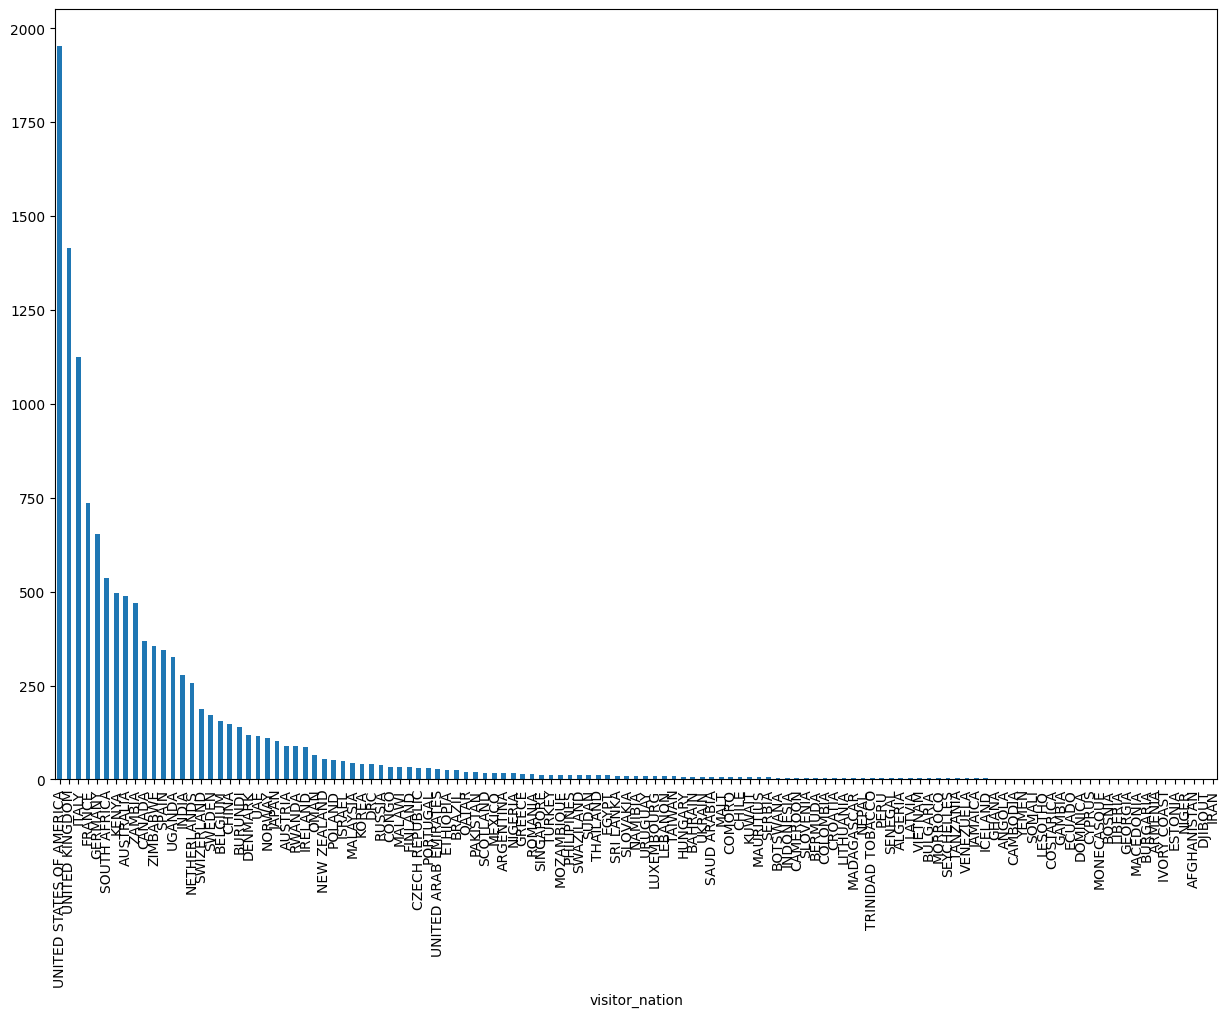

In [120]:
train_df['visitor_nation'].value_counts().plot(kind='bar', figsize=(15, 10))

In [121]:
(train_df['visitor_nation'].value_counts() < 60).sum()

95

In [122]:
train_df['visitor_nation'].value_counts().mean()

100.95934959349593

To handle the visitor nations with fewer than 60 occurrences in both the training and testing datasets, we follow these steps:

1. **Identify Common Countries**:
   - We first calculate the counts of each country in the training dataset using `value_counts()`.
   - Then, we filter the countries that have at least 60 occurrences.

2. **Replace Rare Countries in Train Data**:
   - In the `train_df`, we replace all countries that don't meet the frequency threshold (less than 60 occurrences) with the label "Others".

3. **Replace Rare Countries in Test Data**:
   - Similarly, in `test_df`, countries with fewer than 60 occurrences in the `train_df` are also replaced with "Others".


In [123]:
country_counts = train_df['visitor_nation'].value_counts()

# Identify countries with counts of at least 60 in train_df
common_countries = country_counts[country_counts >= 60].index

# Replace countries in train_df with less than 60 occurrences with 'Others'
train_df['visitor_nation'] = train_df['visitor_nation'].where(
    train_df['visitor_nation'].isin(common_countries), 'Others'
)

# Replace countries in test_df with less than 60 occurrences in train_df with 'Others'
test_df['visitor_nation'] = test_df['visitor_nation'].where(
    test_df['visitor_nation'].isin(common_countries), 'Others'
)


In [124]:
train_df['visitor_nation'].value_counts()

,count
visitor_nation,
UNITED STATES OF AMERICA,1953
UNITED KINGDOM,1415
Others,1268
ITALY,1124
FRANCE,736
GERMANY,655
SOUTH AFRICA,536
KENYA,497
AUSTRALIA,488


In [125]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12648 entries, 0 to 12653
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   12648 non-null  object 
 1   age_bracket                      12640 non-null  object 
 2   key_activity                     12520 non-null  object 
 3   transport_package_international  12501 non-null  object 
 4   package_accomodation             12505 non-null  object 
 5   food_package                     12477 non-null  object 
 6   transport_package_mx             12648 non-null  object 
 7   sightseeing_package              12648 non-null  object 
 8   guided_tour_package              12648 non-null  object 
 9   insurance_package                12413 non-null  object 
 10  days_before_booked               11097 non-null  object 
 11  tour_length                      12246 non-null  object 
 12  special_requirements   

In [126]:
train_df['age_bracket'].value_counts()

,count
age_bracket,
25-44,6142
45-64,3906
18-24,1499
65+,1011
<18,82


In [127]:
test_df.shape

(5852, 15)

In [128]:
train_df = train_df.dropna(subset=['age_bracket'])

In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12640 entries, 0 to 12653
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   12640 non-null  object 
 1   age_bracket                      12640 non-null  object 
 2   key_activity                     12513 non-null  object 
 3   transport_package_international  12493 non-null  object 
 4   package_accomodation             12497 non-null  object 
 5   food_package                     12469 non-null  object 
 6   transport_package_mx             12640 non-null  object 
 7   sightseeing_package              12640 non-null  object 
 8   guided_tour_package              12640 non-null  object 
 9   insurance_package                12405 non-null  object 
 10  days_before_booked               11089 non-null  object 
 11  tour_length                      12238 non-null  object 
 12  special_requirements   

In [130]:
train_df['key_activity'].value_counts()

,count
key_activity,
Wildlife Tourism,5652
Beach Tourism,2858
Conference Tourism,1323
Hunting Tourism,1089
Cultural Tourism,950
Others,641


To handle the missing values in the `key_activity` column, which is categorical, we fill the null values with the **mode** (the most frequent value) of the column. This approach ensures that the missing values are replaced by the most common activity.

In [131]:
mode_key_activity = train_df['key_activity'].mode()[0]

train_df['key_activity'].fillna(mode_key_activity, inplace=True)
test_df['key_activity'].fillna(mode_key_activity, inplace=True)

<ipython-input-131-a221c41d21a0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['key_activity'].fillna(mode_key_activity, inplace=True)
<ipython-input-131-a221c41d21a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['key_activity'].fillna(mode_key_activity, inplace=True)
<ipython-input-131-a221c41d21a0>:4: FutureWarning: 

In [132]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12640 entries, 0 to 12653
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   12640 non-null  object 
 1   age_bracket                      12640 non-null  object 
 2   key_activity                     12640 non-null  object 
 3   transport_package_international  12493 non-null  object 
 4   package_accomodation             12497 non-null  object 
 5   food_package                     12469 non-null  object 
 6   transport_package_mx             12640 non-null  object 
 7   sightseeing_package              12640 non-null  object 
 8   guided_tour_package              12640 non-null  object 
 9   insurance_package                12405 non-null  object 
 10  days_before_booked               11089 non-null  object 
 11  tour_length                      12238 non-null  object 
 12  special_requirements   

In [133]:
train_null_percent = train_df['special_requirements'].isnull().mean() * 100
test_null_percent = test_df['special_requirements'].isnull().mean() * 100

print(f"Percentage of null values in 'special_requirements' (train_df): {train_null_percent:.2f}%")
print(f"Percentage of null values in 'special_requirements' (test_df): {test_null_percent:.2f}%")


Percentage of null values in 'special_requirements' (train_df): 64.16%
Percentage of null values in 'special_requirements' (test_df): 63.67%


### Dropping the 'special_requirements' Column

After checking the percentage of null values in the `special_requirements` column, we found that the proportion of missing values exceeds 60%. Given that a high percentage of missing data can negatively affect model performance, it was decided to drop this column from both the training and testing datasets.


In [134]:
train_df = train_df.drop(columns=['special_requirements'])
test_df = test_df.drop(columns=['special_requirements'])

In [135]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12640 entries, 0 to 12653
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   12640 non-null  object 
 1   age_bracket                      12640 non-null  object 
 2   key_activity                     12640 non-null  object 
 3   transport_package_international  12493 non-null  object 
 4   package_accomodation             12497 non-null  object 
 5   food_package                     12469 non-null  object 
 6   transport_package_mx             12640 non-null  object 
 7   sightseeing_package              12640 non-null  object 
 8   guided_tour_package              12640 non-null  object 
 9   insurance_package                12405 non-null  object 
 10  days_before_booked               11089 non-null  object 
 11  tour_length                      12238 non-null  object 
 12  category               

### Dropping Rows with Null Values in Specific Columns

To ensure data integrity, we decided to drop rows that have missing values in the following columns:
- `transport_package_international`
- `package_accomodation`
- `food_package`
- `insurance_package`

In [136]:
train_df = train_df.dropna(subset=['transport_package_international', 'package_accomodation', 'food_package','insurance_package'])

In [137]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11955 entries, 0 to 12653
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   11955 non-null  object 
 1   age_bracket                      11955 non-null  object 
 2   key_activity                     11955 non-null  object 
 3   transport_package_international  11955 non-null  object 
 4   package_accomodation             11955 non-null  object 
 5   food_package                     11955 non-null  object 
 6   transport_package_mx             11955 non-null  object 
 7   sightseeing_package              11955 non-null  object 
 8   guided_tour_package              11955 non-null  object 
 9   insurance_package                11955 non-null  object 
 10  days_before_booked               10498 non-null  object 
 11  tour_length                      11567 non-null  object 
 12  category               

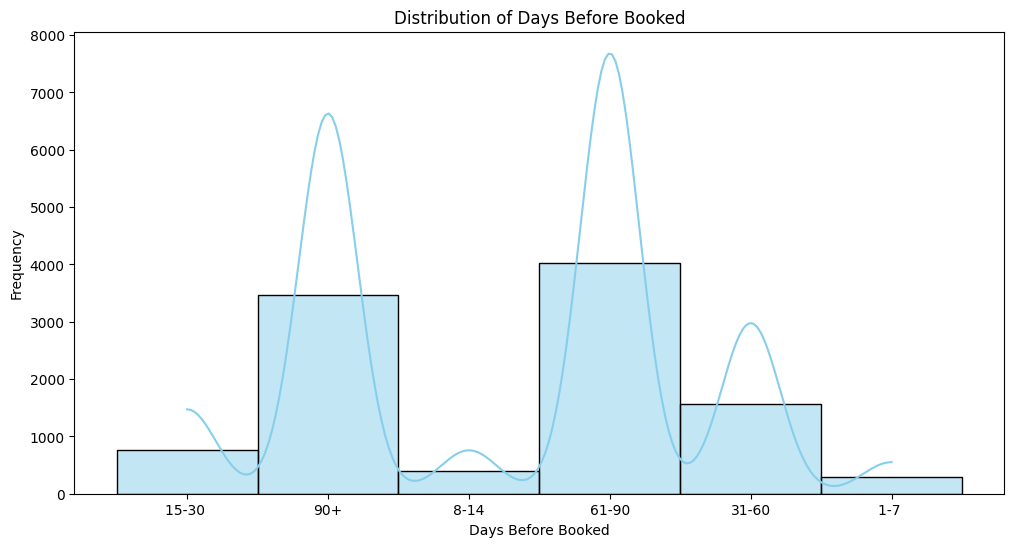

In [138]:
days_before_booked_counts = train_df['days_before_booked'].value_counts()

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.histplot(train_df['days_before_booked'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Days Before Booked")
plt.xlabel("Days Before Booked")
plt.ylabel("Frequency")
plt.show()

### Filling Null Values in 'days_before_booked' with Random Values

In the `days_before_booked` column, we found some missing values. To handle this, we decided to randomly assign one of the following values to the missing entries as these age group sections dominate the count:
- "61-90"
- "90+"

This approach ensures that the missing data is imputed while maintaining the categorical nature of the variable. We used `numpy`'s `random.choice()` function to randomly select values for the missing entries.

In [139]:
import numpy as np

# Define the values to randomly choose from
fill_values = ["61-90", "90+"]

# Fill null values in 'days_before_booked' in train_df
train_df.loc[train_df['days_before_booked'].isnull(), 'days_before_booked'] = np.random.choice(
    fill_values, size=train_df['days_before_booked'].isnull().sum()
)

# Fill null values in 'days_before_booked' in test_df
test_df.loc[test_df['days_before_booked'].isnull(), 'days_before_booked'] = np.random.choice(
    fill_values, size=test_df['days_before_booked'].isnull().sum()
)


In [140]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11955 entries, 0 to 12653
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   11955 non-null  object 
 1   age_bracket                      11955 non-null  object 
 2   key_activity                     11955 non-null  object 
 3   transport_package_international  11955 non-null  object 
 4   package_accomodation             11955 non-null  object 
 5   food_package                     11955 non-null  object 
 6   transport_package_mx             11955 non-null  object 
 7   sightseeing_package              11955 non-null  object 
 8   guided_tour_package              11955 non-null  object 
 9   insurance_package                11955 non-null  object 
 10  days_before_booked               11955 non-null  object 
 11  tour_length                      11567 non-null  object 
 12  category               

In [141]:
train_df['tour_length'].value_counts()

,count
tour_length,
7-14,4002
30+,3897
1-6,2467
15-30,1201


### Filling Null Values in 'tour_length' with Random Values

In the `tour_length` column, some values are missing. To handle this, we decided to randomly assign one of the following values to the missing entries:
- "7-14"
- "30+"

This approach maintains the categorical nature of the `tour_length` variable.

In [142]:
fill_values = ["7-14", "30+"]

# Fill null values in 'tour_length' with a random choice between "7-14" and "30+"
train_df.loc[train_df['tour_length'].isnull(), 'tour_length'] = np.random.choice(
    fill_values, size=train_df['tour_length'].isnull().sum()
)

test_df.loc[test_df['tour_length'].isnull(), 'tour_length'] = np.random.choice(
    fill_values, size=test_df['tour_length'].isnull().sum()
)

In [143]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11955 entries, 0 to 12653
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   11955 non-null  object 
 1   age_bracket                      11955 non-null  object 
 2   key_activity                     11955 non-null  object 
 3   transport_package_international  11955 non-null  object 
 4   package_accomodation             11955 non-null  object 
 5   food_package                     11955 non-null  object 
 6   transport_package_mx             11955 non-null  object 
 7   sightseeing_package              11955 non-null  object 
 8   guided_tour_package              11955 non-null  object 
 9   insurance_package                11955 non-null  object 
 10  days_before_booked               11955 non-null  object 
 11  tour_length                      11955 non-null  object 
 12  category               

In [144]:
train_df = train_df[train_df['category'].notnull()]

In [145]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11925 entries, 0 to 12653
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   11925 non-null  object 
 1   age_bracket                      11925 non-null  object 
 2   key_activity                     11925 non-null  object 
 3   transport_package_international  11925 non-null  object 
 4   package_accomodation             11925 non-null  object 
 5   food_package                     11925 non-null  object 
 6   transport_package_mx             11925 non-null  object 
 7   sightseeing_package              11925 non-null  object 
 8   guided_tour_package              11925 non-null  object 
 9   insurance_package                11925 non-null  object 
 10  days_before_booked               11925 non-null  object 
 11  tour_length                      11925 non-null  object 
 12  category               

In [146]:
train_df.shape

(11925, 15)

In [147]:
test_df.shape

(5852, 14)

In [148]:
train_df.head()

,visitor_nation,age_bracket,key_activity,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,tour_length,category,total_nights,total_count
0,FRANCE,45-64,Beach Tourism,No,No,No,No,No,No,No,90+,30+,1.0,7,3.0
1,KENYA,45-64,Conference Tourism,No,No,No,No,No,No,No,15-30,30+,2.0,6,1.0
2,SOUTH AFRICA,25-44,Cultural Tourism,No,No,No,No,No,No,No,90+,30+,2.0,6,2.0
3,ITALY,25-44,Wildlife Tourism,No,Yes,Yes,Yes,Yes,Yes,No,8-14,7-14,0.0,7,2.0
4,ITALY,25-44,Beach Tourism,Yes,Yes,Yes,No,No,No,No,90+,7-14,0.0,7,2.0


# Outlier Removal

### Checking Values Within the Interquartile Range (IQR)

To identify the values within a valid range (Q1 - 1.5 * IQR to Q3 + 1.5 * IQR) for a numerical column, we can compute the IQR and apply the bounds to filter the data. This method helps us detect potential outliers by considering values outside this range as outliers.


### Total Nights

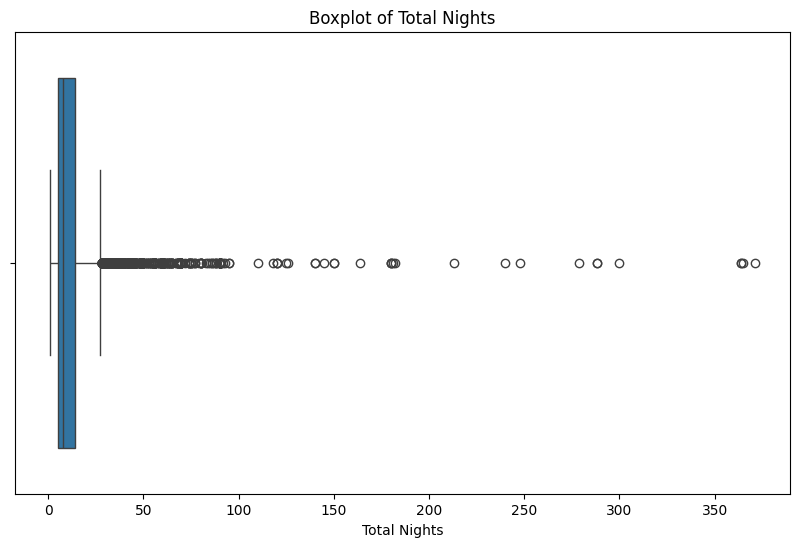

In [149]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['total_nights'])
plt.title('Boxplot of Total Nights')
plt.xlabel('Total Nights')
plt.show()

### Total Count

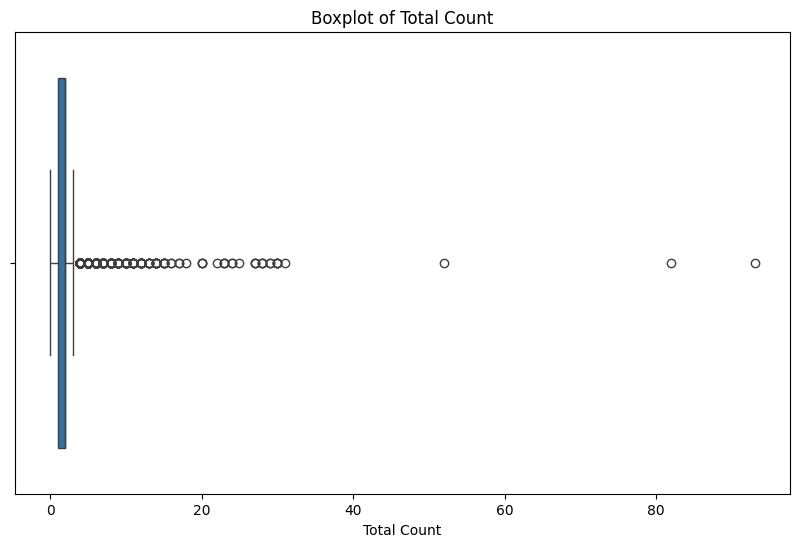

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['total_count'])
plt.title('Boxplot of Total Count')
plt.xlabel('Total Count')
plt.show()

### Applying One-Hot Encoding on Categorical Columns

One-hot encoding is a method to convert categorical variables into a format that can be provided to machine learning algorithms. This technique creates a new binary column for each category, where `1` represents the presence of that category and `0` represents its absence.

In our case, we applied one-hot encoding to the `train_df` dataset using `pd.get_dummies()` to handle all categorical columns. We also set the `drop_first=True` parameter to avoid the dummy variable trap, which can cause multicollinearity in models.


In [151]:
train_df_encoded = pd.get_dummies(train_df, drop_first=True,dtype='int64')

In [152]:
train_df_encoded.head()

,category,total_nights,total_count,visitor_nation_AUSTRIA,visitor_nation_BELGIUM,visitor_nation_BURUNDI,visitor_nation_CANADA,visitor_nation_CHINA,visitor_nation_DENMARK,visitor_nation_FRANCE,...,guided_tour_package_Yes,insurance_package_Yes,days_before_booked_15-30,days_before_booked_31-60,days_before_booked_61-90,days_before_booked_8-14,days_before_booked_90+,tour_length_15-30,tour_length_30+,tour_length_7-14
0,1.0,7,3.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,2.0,6,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2.0,6,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.0,7,2.0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0.0,7,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [153]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11925 entries, 0 to 12653
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   category                                 11925 non-null  float64
 1   total_nights                             11925 non-null  int64  
 2   total_count                              11925 non-null  float64
 3   visitor_nation_AUSTRIA                   11925 non-null  int64  
 4   visitor_nation_BELGIUM                   11925 non-null  int64  
 5   visitor_nation_BURUNDI                   11925 non-null  int64  
 6   visitor_nation_CANADA                    11925 non-null  int64  
 7   visitor_nation_CHINA                     11925 non-null  int64  
 8   visitor_nation_DENMARK                   11925 non-null  int64  
 9   visitor_nation_FRANCE                    11925 non-null  int64  
 10  visitor_nation_GERMANY                   11925 non-

In [154]:
test_df_encoded = pd.get_dummies(test_df, drop_first=True,dtype='int64')

In [155]:
test_df_encoded.head()

,total_nights,total_count,visitor_nation_AUSTRIA,visitor_nation_BELGIUM,visitor_nation_BURUNDI,visitor_nation_CANADA,visitor_nation_CHINA,visitor_nation_DENMARK,visitor_nation_FRANCE,visitor_nation_GERMANY,...,guided_tour_package_Yes,insurance_package_Yes,days_before_booked_15-30,days_before_booked_31-60,days_before_booked_61-90,days_before_booked_8-14,days_before_booked_90+,tour_length_15-30,tour_length_30+,tour_length_7-14
0,14,1.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,13,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,9,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,5,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,6,2.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


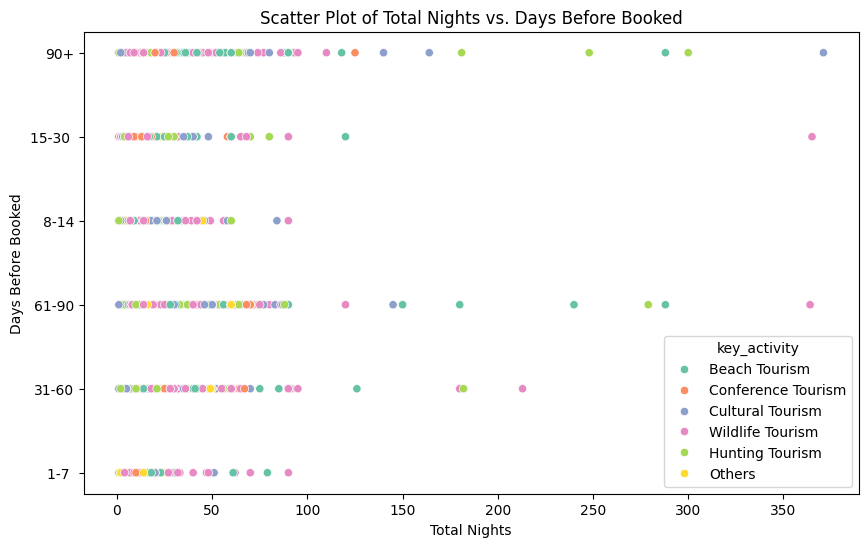

In [156]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='total_nights', y='days_before_booked', hue='key_activity', palette='Set2')
plt.title('Scatter Plot of Total Nights vs. Days Before Booked')
plt.xlabel('Total Nights')
plt.ylabel('Days Before Booked')
plt.show()


<ipython-input-157-b7d2daf30b82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x='key_activity', y='total_nights', palette='muted')


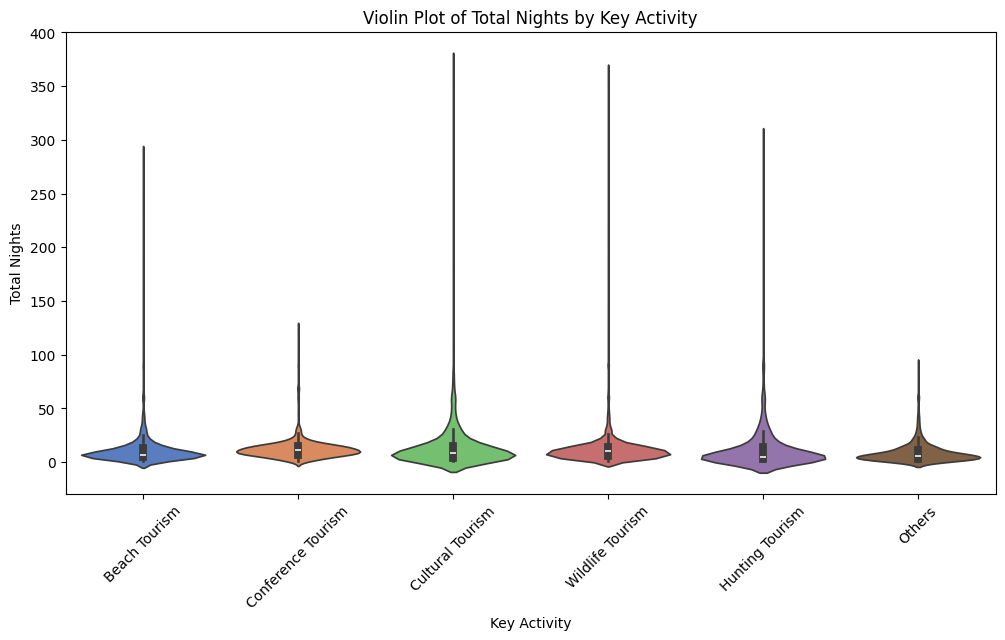

In [157]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=train_df, x='key_activity', y='total_nights', palette='muted')
plt.title('Violin Plot of Total Nights by Key Activity')
plt.xlabel('Key Activity')
plt.ylabel('Total Nights')
plt.xticks(rotation=45)
plt.show()


The `stratify` parameter in `train_test_split` ensures that the class distribution in the target variable (`y`) is preserved in both the training and validation sets, particularly important for imbalanced datasets.

# Outlier Removal

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the target column
# Replace 'target_column' with the actual name of the column in your DataFrame
X = train_df_encoded.drop(columns=['category'])  # Features
y = train_df_encoded['category']  # Target

# Split the data first to avoid data leakage before scaling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform both train and validation sets
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)


In [159]:
X_train

,total_nights,total_count,visitor_nation_AUSTRIA,visitor_nation_BELGIUM,visitor_nation_BURUNDI,visitor_nation_CANADA,visitor_nation_CHINA,visitor_nation_DENMARK,visitor_nation_FRANCE,visitor_nation_GERMANY,...,guided_tour_package_Yes,insurance_package_Yes,days_before_booked_15-30,days_before_booked_31-60,days_before_booked_61-90,days_before_booked_8-14,days_before_booked_90+,tour_length_15-30,tour_length_30+,tour_length_7-14
3545,5,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11850,7,2.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3196,7,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3983,6,2.0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
9726,45,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,7,2.0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
10020,11,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5465,4,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7756,6,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [160]:
X_train['total_nights'].describe()

,total_nights
count,9540.000000
mean,11.804403
std,15.775096
min,1.000000
25%,5.000000
50%,8.500000
75%,14.000000
max,371.000000


In [161]:
import numpy as np

# Calculate Q1, Q3, and IQR for 'total_nights'
Q1 = X_train['total_nights'].quantile(0.25)
Q3 = X_train['total_nights'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter to keep only rows within the bounds in X_train and align y_train
outlier_filter = (X_train['total_nights'] >= lower_bound) & (X_train['total_nights'] <= upper_bound)
X_train_filtered = X_train[outlier_filter]
y_train_filtered = y_train[outlier_filter]


In [162]:
y_train_filtered

,category
3545,1.0
11850,0.0
3196,0.0
3983,0.0
2390,1.0
...,...
4293,0.0
10020,1.0
5465,1.0
7756,0.0


## After removing total nights outliers

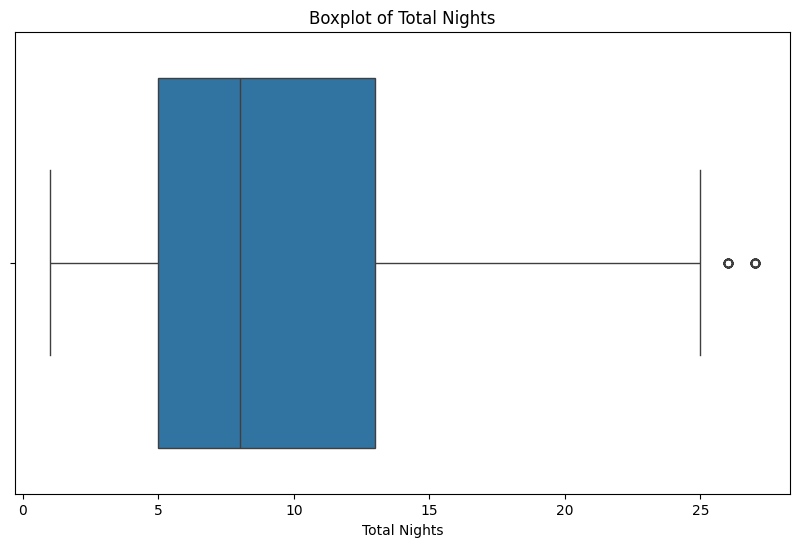

In [163]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train_filtered['total_nights'])
plt.title('Boxplot of Total Nights')
plt.xlabel('Total Nights')
plt.show()

In [164]:
X_train_filtered

,total_nights,total_count,visitor_nation_AUSTRIA,visitor_nation_BELGIUM,visitor_nation_BURUNDI,visitor_nation_CANADA,visitor_nation_CHINA,visitor_nation_DENMARK,visitor_nation_FRANCE,visitor_nation_GERMANY,...,guided_tour_package_Yes,insurance_package_Yes,days_before_booked_15-30,days_before_booked_31-60,days_before_booked_61-90,days_before_booked_8-14,days_before_booked_90+,tour_length_15-30,tour_length_30+,tour_length_7-14
3545,5,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11850,7,2.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3196,7,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3983,6,2.0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2390,4,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,7,2.0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
10020,11,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5465,4,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7756,6,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [165]:
# Calculate Q1, Q3, and IQR for 'total_count'
Q1_total_count = X_train_filtered['total_count'].quantile(0.25)
Q3_total_count = X_train_filtered['total_count'].quantile(0.75)
IQR_total_count = Q3_total_count - Q1_total_count

# Define the outlier range for 'total_count'
lower_bound_total_count = Q1_total_count - 1.5 * IQR_total_count
upper_bound_total_count = Q3_total_count + 1.5 * IQR_total_count

# Filter to keep only rows within the bounds in X_train_filtered and align y_train_filtered
outlier_filter_total_count = (X_train_filtered['total_count'] >= lower_bound_total_count) & \
                             (X_train_filtered['total_count'] <= upper_bound_total_count)

X_train_filtered = X_train_filtered[outlier_filter_total_count]
y_train_filtered = y_train_filtered[outlier_filter_total_count]


In [166]:
X_train_filtered

,total_nights,total_count,visitor_nation_AUSTRIA,visitor_nation_BELGIUM,visitor_nation_BURUNDI,visitor_nation_CANADA,visitor_nation_CHINA,visitor_nation_DENMARK,visitor_nation_FRANCE,visitor_nation_GERMANY,...,guided_tour_package_Yes,insurance_package_Yes,days_before_booked_15-30,days_before_booked_31-60,days_before_booked_61-90,days_before_booked_8-14,days_before_booked_90+,tour_length_15-30,tour_length_30+,tour_length_7-14
3545,5,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11850,7,2.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3196,7,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3983,6,2.0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2390,4,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,7,2.0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
10020,11,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5465,4,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7756,6,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [167]:
y_train_filtered

,category
3545,1.0
11850,0.0
3196,0.0
3983,0.0
2390,1.0
...,...
4293,0.0
10020,1.0
5465,1.0
7756,0.0


### After removing Total Count Outliers

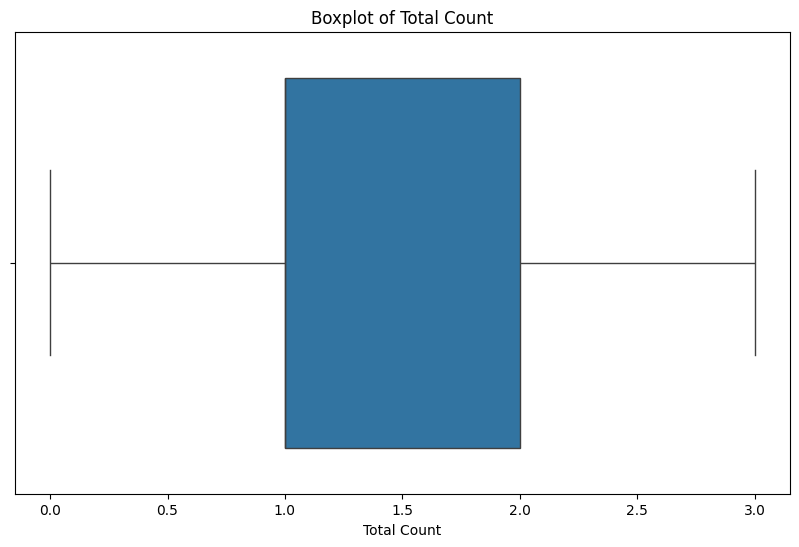

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train_filtered['total_count'])
plt.title('Boxplot of Total Count')
plt.xlabel('Total Count')
plt.show()

# Model Training

### Random Forest Classifier

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier with multi-class support
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_filtered, y_train_filtered)


RandomForestClassifier(random_state=42)

In [170]:
val_predictions = rf_model.predict(X_val)

In [171]:
val_predictions

array([1., 1., 0., ..., 0., 1., 0.])

In [172]:
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

Validation Accuracy: 0.7270440251572327


In [173]:
test_df_encoded

,total_nights,total_count,visitor_nation_AUSTRIA,visitor_nation_BELGIUM,visitor_nation_BURUNDI,visitor_nation_CANADA,visitor_nation_CHINA,visitor_nation_DENMARK,visitor_nation_FRANCE,visitor_nation_GERMANY,...,guided_tour_package_Yes,insurance_package_Yes,days_before_booked_15-30,days_before_booked_31-60,days_before_booked_61-90,days_before_booked_8-14,days_before_booked_90+,tour_length_15-30,tour_length_30+,tour_length_7-14
0,14,1.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,13,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,9,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,5,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,6,2.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,3,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5848,9,2.0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5849,8,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5850,2,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [174]:
temp_test_df = pd.read_csv('test.csv')

In [175]:
temp_test_df

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements
0,tour_id8gzpck76,CONGO,25-44,Alone,0.0,1.0,Widlife Tourism,Business,No,14,...,No,No,No,No,No,No,15-30,"sunny,",15-30,"wheelchair,"
1,tour_idow1zxkou,SWIZERLAND,45-64,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,8,...,Yes,Yes,No,No,Yes,No,61-90,Stormy,1-6,NaN
2,tour_idue7esfqz,MEXICO,45-64,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Leisure and Holidays,Yes,3,...,Yes,Yes,Yes,Yes,Yes,No,1-7,Stormy,30+,none
3,tour_idnj3mjzpb,JAPAN,25-44,With Other Friends/Relatives,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,5,...,Yes,Yes,Yes,Yes,Yes,No,90+,"sunny,",7-14,NaN
4,tour_ida3us5yk2,SPAIN,25-44,With Other Friends/Relatives,2.0,0.0,Wildlife Tourism,Leisure and Holidays,Yes,0,...,Yes,Yes,No,Yes,No,Yes,61-90,Stormy,30+,"dietary needs,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,tour_id0bnf9xcp,ZIMBABWE,25-44,Alone,0.0,1.0,Beach Tourism,Business,Yes,3,...,No,No,No,No,No,No,NaN,other,1-6,NaN
5848,tour_idqfcw3991,UNITED STATES OF AMERICA,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,9,...,Yes,Yes,Yes,Yes,Yes,No,31-60,"sunny,",30+,NaN
5849,tour_idrarc7v2s,SWEDEN,25-44,With Spouse and Children,2.0,1.0,Beach Tourism,Leisure and Holidays,Yes,0,...,No,No,No,No,No,No,61-90,NaN,30+,NaN
5850,tour_idvuu6dqrf,PAKISTAN,25-44,Alone,0.0,1.0,Hunting Tourism,Visiting Friends and Relatives,Yes,2,...,No,No,No,No,No,No,61-90,"cloudy,",7-14,NaN


In [176]:
import pandas as pd

# Assuming temp_test_df contains the 'trip_id' column and is aligned with test_df_encoded
# Make predictions
predictions = rf_model.predict(test_df_encoded)

# Create a new DataFrame with trip_id and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
    'category': predictions
})

# Save to a new CSV file
results_df.to_csv('predictions_results.csv', index=False)

print("Predictions saved to predictions_results.csv")


Predictions saved to predictions_results.csv


# Hyperparameter Tuning

In [177]:
rf_model = RandomForestClassifier(random_state=42)

# Set the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20,30]
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2, 4]
}

# Applying Grid Search CV to explore and find the best hyperparameters

In [178]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_filtered, y_train_filtered)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Best Cross-validation Score: 0.7557157912209658


In [179]:
predictions = grid_search.predict(test_df_encoded)

# Create a new DataFrame with trip_id and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
    'category': predictions
})

# Save to a new CSV file
results_df.to_csv('predictions_results_rf10_100.csv', index=False)

### Adaboost Classifier

In [181]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the base classifier
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost model
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost model on the filtered data
ada_model.fit(X_train_filtered, y_train_filtered)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [182]:
val_predictions = ada_model.predict(X_val)

In [183]:
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

Validation Accuracy: 0.7274633123689728


In [184]:
test_df_encoded['total_count'].fillna(test_df_encoded['total_count'].median(), inplace=True)

<ipython-input-184-2a9a0c9f7ca0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_encoded['total_count'].fillna(test_df_encoded['total_count'].median(), inplace=True)


In [185]:
test_df_encoded.isnull().sum()

,0
total_nights,0
total_count,0
visitor_nation_AUSTRIA,0
visitor_nation_BELGIUM,0
visitor_nation_BURUNDI,0
visitor_nation_CANADA,0
visitor_nation_CHINA,0
visitor_nation_DENMARK,0
visitor_nation_FRANCE,0
visitor_nation_GERMANY,0


In [186]:
predictions = ada_model.predict(test_df_encoded)

# Create a new DataFrame with trip_id and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
    'category': predictions
})

# Save to a new CSV file
results_df.to_csv('predictions_results_adaboost.csv', index=False)

In [187]:
from sklearn.model_selection import RandomizedSearchCV

# Applying RandomizedSearchCV to explore and find the best hyperparamters

In [188]:
param_dist = {
    'n_estimators': np.random.randint(10, 300, 5),            # Sample 10 values between 10 and 300
    'learning_rate': np.linspace(0.01, 2.0, 5),               # 20 values between 0.01 and 2.0
    'estimator__max_depth': [1, 2, 3, 4, 5, None]              # Allow None for unlimited depth
}

In [189]:
# Initialize the weak learner
base_estimator = DecisionTreeClassifier()

# Create AdaBoost model
ada_model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=ada_model, param_distributions=param_dist,
                                   n_iter=50, cv=2, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model on the filtered training data
random_search.fit(X_train_filtered, y_train_filtered)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RandomizedSearchCV(cv=2,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                                random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'estimator__max_depth': [1, 2, 3, 4, 5,
                                                                 None],
                                        'learning_rate': array([0.01  , 0.5075, 1.005 , 1.5025, 2.    ]),
                                        'n_estimators': array([252, 138,  79,  76, 243])},
                   random_state=42, scoring='accuracy')

### Gradient Boosting Classifier

In [190]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the filtered training data
gb_model.fit(X_train_filtered, y_train_filtered)

GradientBoostingClassifier(random_state=42)

In [191]:
val_predictions = gb_model.predict(X_val)

In [192]:
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

Validation Accuracy: 0.7392033542976939


In [193]:
predictions = gb_model.predict(test_df_encoded)

# Create a new DataFrame with trip_id and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
    'category': predictions
})

# Save to a new CSV file
results_df.to_csv('predictions_results_gb.csv', index=False)

In [194]:
param_dist = {
    'n_estimators': [50, 100, 150],           # Small set of values for number of boosting rounds        # Limited learning rates
    'max_depth': [2, 3, 4],                   # Limited tree depths
    'subsample': [0.8, 1.0]                   # Testing subsampling (0.8 for faster but potentially less accurate model)
}

In [195]:
gb_model = GradientBoostingClassifier(random_state=42)

# Set up RandomizedSearchCV with only a few iterations
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model on the filtered training data
random_search.fit(X_train_filtered, y_train_filtered)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [196]:
val_predictions = random_search.predict(X_val)

In [197]:
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

Validation Accuracy: 0.7392033542976939


In [198]:
predictions = random_search.predict(test_df_encoded)

# Create a new DataFrame with trip_id and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
    'category': predictions
})

# Save to a new CSV file
results_df.to_csv('predictions_results_gbr.csv', index=False)

In [199]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 1.0]
}

In [200]:
gb_model = GradientBoostingClassifier(random_state=42)

# Set up RandomizedSearchCV with only a few iterations
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model on the filtered training data
random_search.fit(X_train_filtered, y_train_filtered)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [201]:
val_predictions = random_search.predict(X_val)

In [202]:
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

Validation Accuracy: 0.7383647798742138


In [203]:
predictions = random_search.predict(test_df_encoded)

# Create a new DataFrame with trip_id and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
    'category': predictions
})

# Save to a new CSV file
results_df.to_csv('predictions_results_gbrr.csv', index=False)

### XgBoost Classifier

In [204]:
pip install xgboost

In [205]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score


#### Data Cleaning needed for applying XgBoost

In [207]:
print(X_train_filtered.columns)

Index(['total_nights', 'total_count', 'visitor_nation_AUSTRIA',
       'visitor_nation_BELGIUM', 'visitor_nation_BURUNDI',
       'visitor_nation_CANADA', 'visitor_nation_CHINA',
       'visitor_nation_DENMARK', 'visitor_nation_FRANCE',
       'visitor_nation_GERMANY', 'visitor_nation_INDIA',
       'visitor_nation_IRELAND', 'visitor_nation_ITALY',
       'visitor_nation_JAPAN', 'visitor_nation_KENYA',
       'visitor_nation_NETHERLANDS', 'visitor_nation_NORWAY',
       'visitor_nation_OMAN', 'visitor_nation_Others', 'visitor_nation_RWANDA',
       'visitor_nation_SOUTH AFRICA', 'visitor_nation_SPAIN',
       'visitor_nation_SWEDEN', 'visitor_nation_SWIZERLAND',
       'visitor_nation_UAE', 'visitor_nation_UGANDA',
       'visitor_nation_UNITED KINGDOM',
       'visitor_nation_UNITED STATES OF AMERICA', 'visitor_nation_ZAMBIA',
       'visitor_nation_ZIMBABWE', 'age_bracket_25-44', 'age_bracket_45-64',
       'age_bracket_65+', 'age_bracket_<18', 'key_activity_Conference Tourism',
    

In [208]:
X_train_filtered.columns = X_train_filtered.columns.str.replace('[\[\],<>]', '', regex=True)

In [209]:
X_train_filtered.columns

Index(['total_nights', 'total_count', 'visitor_nation_AUSTRIA',
       'visitor_nation_BELGIUM', 'visitor_nation_BURUNDI',
       'visitor_nation_CANADA', 'visitor_nation_CHINA',
       'visitor_nation_DENMARK', 'visitor_nation_FRANCE',
       'visitor_nation_GERMANY', 'visitor_nation_INDIA',
       'visitor_nation_IRELAND', 'visitor_nation_ITALY',
       'visitor_nation_JAPAN', 'visitor_nation_KENYA',
       'visitor_nation_NETHERLANDS', 'visitor_nation_NORWAY',
       'visitor_nation_OMAN', 'visitor_nation_Others', 'visitor_nation_RWANDA',
       'visitor_nation_SOUTH AFRICA', 'visitor_nation_SPAIN',
       'visitor_nation_SWEDEN', 'visitor_nation_SWIZERLAND',
       'visitor_nation_UAE', 'visitor_nation_UGANDA',
       'visitor_nation_UNITED KINGDOM',
       'visitor_nation_UNITED STATES OF AMERICA', 'visitor_nation_ZAMBIA',
       'visitor_nation_ZIMBABWE', 'age_bracket_25-44', 'age_bracket_45-64',
       'age_bracket_65+', 'age_bracket_18', 'key_activity_Conference Tourism',
     

In [210]:
X_train_filtered = pd.DataFrame(X_train_filtered)
X_train_filtered.columns = [f'feature_{i}' for i in range(X_train_filtered.shape[1])]

### XgBoost : Objective - Binary:Logistic

In [211]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_filtered, y_train_filtered)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [212]:
X_val.columns = X_val.columns.str.replace('[\[\],<>]', '', regex=True)

In [213]:
X_val = pd.DataFrame(X_val)
X_val.columns = [f'feature_{i}' for i in range(X_val.shape[1])]

In [214]:
val_predictions = xgb_model.predict(X_val)

In [215]:
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

Validation Accuracy: 0.7220125786163522


In [216]:
test_df_encoded.columns = test_df_encoded.columns.str.replace('[\[\],<>]', '', regex=True)

In [217]:
test_df_encoded.columns = [f'feature_{i}' for i in range(test_df_encoded.shape[1])]

In [218]:
predictions = xgb_model.predict(test_df_encoded)

# Create a new DataFrame with trip_id and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
    'category': predictions
})

# Save to a new CSV file
results_df.to_csv('predictions_results_xgb.csv', index=False)

### XgBoost : Objective - Multi:Softmax

In [219]:
# Initialize the XGBoost classifier for multiclass classification
num_classes = len(set(y_train_filtered))  # Determine the number of classes in the training labels
xgb_model1 = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=42)

# Fit the model on the filtered training data
xgb_model1.fit(X_train_filtered, y_train_filtered)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [220]:
val_predictions = xgb_model1.predict(X_val)

In [221]:
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

Validation Accuracy: 0.7220125786163522


In [222]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', random_state=42)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],  # Regularization term
}


In [223]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,        # Number of different combinations to try
    scoring='accuracy',
    cv=3,             # Number of cross-validation folds
    random_state=42,
    n_jobs=-1         # Use all available cores
)

# Fit the model on the filtered training data
random_search.fit(X_train_filtered, y_train_filtered)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softmax', ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [224]:
print("Best parameters found:", random_search.best_params_)

# Use the best model
best_xgb_model = random_search.best_estimator_


Best parameters found: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}


In [225]:
val_predictions = random_search.predict(X_val)

In [226]:
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

Validation Accuracy: 0.7425576519916143


In [227]:
predictions = random_search.predict(test_df_encoded)

# Create a new DataFrame with trip_id and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
    'category': predictions
})

# Save to a new CSV file
results_df.to_csv('predictions_results_xgb_ht.csv', index=False)

In [228]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', random_state=42)

# Define the parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

# Use RandomizedSearchCV for hyperparameter tuning with early stopping
search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,  # Cross-validation splitting strategy
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model to the training data with early stopping
search.fit(X_train_filtered, y_train_filtered)

# Evaluate on the validation set
val_accuracy = accuracy_score(y_val, search.predict(X_val))
print(f"Validation Accuracy: {val_accuracy:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Validation Accuracy: 0.7346


In [229]:
predictions = search.predict(test_df_encoded)

# Create a new DataFrame with trip_id and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
    'category': predictions
})

# Save to a new CSV file
results_df.to_csv('predictions_results_xgb_more_hyper.csv', index=False)